In [1]:
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
import os
import cv2
import random

In [2]:
#gpus = tf.config.experimental.list_physical_devices('GPU')
#for gpu in gpus: 
#    tf.config.experimental.set_memory_growth(gpu, True)
#tf.config.list_physical_devices('GPU')

In [3]:
dataset_path= os.path.join('dataset')
categories=['Boot','Sandal','Shoe']

In [4]:
img_size=100
data=[]
for category in categories:
    folder=os.path.join(dataset_path,category)
    label=categories.index(category)
    for img in os.listdir(folder):
        img_path=os.path.join(folder,img)
        img_arr=cv2.imread(img_path)
        img_arr=cv2.resize(img_arr,(img_size, img_size))
        data.append([img_arr, label])

random.shuffle(data)        
len(data) 

15000

In [5]:
x=[]
y=[]
for i,j in data:
    x.append(i)
    y.append(j)

In [6]:
x=np.array(x)
#x = tf.convert_to_tensor(x)
y=np.array(y)
x=x/255

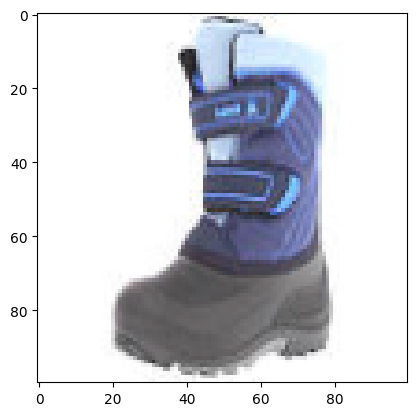

In [7]:
plt.imshow(x[2])

In [8]:
x.shape

(15000, 100, 100, 3)

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.losses import SparseCategoricalCrossentropy

In [11]:
model=Sequential()
model.add(tf.keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(tf.keras.layers.MaxPool2D(2,2))
model.add(tf.keras.layers.Conv2D(32,(3,3),activation='relu'))
model.add(tf.keras.layers.MaxPool2D(2,2))
model.add(tf.keras.layers.Conv2D(16,(3,3),activation='relu'))
model.add(tf.keras.layers.MaxPool2D(2,2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=1600,activation='relu'))
model.add(tf.keras.layers.Dense(units=400,activation='relu'))
model.add(tf.keras.layers.Dense(units=100,activation='relu'))
model.add(tf.keras.layers.Dense(units=25,activation='relu'))
model.add(tf.keras.layers.Dense(units=3,activation='softmax'))

model.build(x.shape)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (15000, 98, 98, 64)       1792      
                                                                 
 max_pooling2d (MaxPooling2D  (15000, 49, 49, 64)      0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (15000, 47, 47, 32)       18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (15000, 23, 23, 32)      0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (15000, 21, 21, 16)       4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (15000, 10, 10, 16)     

In [12]:
model.compile(optimizer='adam',
             loss=SparseCategoricalCrossentropy(),
             metrics=['accuracy'])
hist=model.fit(x,y,epochs=5,validation_split=0.2)

Epoch 1/5
375/375 [==============================] - 20s 23ms/step - loss: 0.3359 - Accuracy: 0.8655 - val_loss: 0.1657 - val_Accuracy: 0.9470
Epoch 2/5
375/375 [==============================] - 8s 21ms/step - loss: 0.1486 - Accuracy: 0.9480 - val_loss: 0.1516 - val_Accuracy: 0.9573
Epoch 3/5
375/375 [==============================] - 8s 21ms/step - loss: 0.1021 - Accuracy: 0.9653 - val_loss: 0.1032 - val_Accuracy: 0.9683
Epoch 4/5
375/375 [==============================] - 8s 21ms/step - loss: 0.0749 - Accuracy: 0.9730 - val_loss: 0.0863 - val_Accuracy: 0.9713
Epoch 5/5
375/375 [==============================] - 8s 21ms/step - loss: 0.0567 - Accuracy: 0.9824 - val_loss: 0.0877 - val_Accuracy: 0.9723


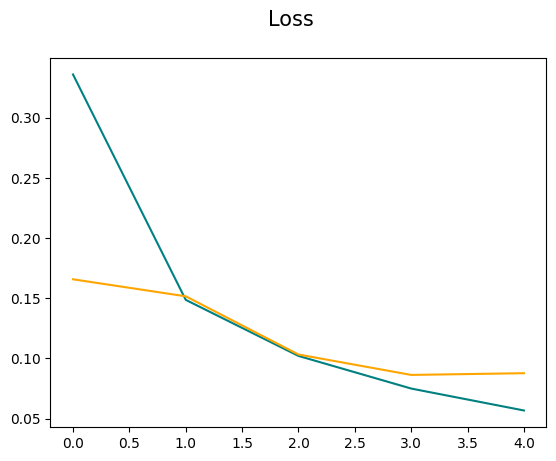

In [13]:
fig=plt.figure()
plt.plot(hist.history['loss'],color='teal', label='loss')
plt.plot(hist.history['val_loss'],color='orange', label='loss')
fig.suptitle('Loss', fontsize=15)
plt.show()

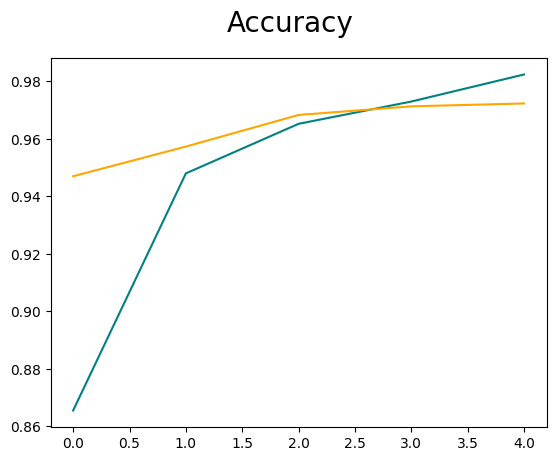

In [16]:
fig = plt.figure()
plt.plot(hist.history['Accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_Accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.show()